In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
youtube = pd.read_csv("USvideos.csv")
youtube = youtube[youtube['category_id']==26]

# Create a dataframe called "youtube"
We will only keep the columns 'title', 'tags', 'views', 'trending_date', and 'publish_time'. We also drop any rows with null values.

In [3]:
youtube = youtube[['title','tags','views','trending_date','publish_time']]
youtube.reset_index(drop=True, inplace=True)
youtube = youtube.dropna()
youtube.head()

,title,tags,views,trending_date,publish_time
0,"What $4,800 Will Get You In NYC | Sweet Digs H...","refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,17.14.11,2017-11-12T16:00:01.000Z
1,A Smart... MUG?! - Take apart a Heated Thermos!,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,17.14.11,2017-11-13T16:00:03.000Z
2,iPhone X vs Makeup Transformation (Face ID TEST),"iphone x|""iphonex makeup""|""iphonex test""|""new ...",1456472,17.14.11,2017-11-12T00:45:54.000Z
3,John Lewis Christmas Ad 2017 - #MozTheMonster,"christmas|""john lewis christmas""|""john lewis""|...",7224515,17.14.11,2017-11-10T07:38:29.000Z
4,A VERY #EXTRA EBAY SHOPPING HAUL!,"ebay|""haul""|""cheap""|""challenge""|""extra""|""amber...",484185,17.14.11,2017-11-11T02:42:23.000Z


In [4]:
youtube.size

20730

# Process tags into our dataframe
We store tags of each video in a list, which we keep in the variable 'new_tags'. 

We store the number of tags of each video in a list, which we keep in the variable 'count_tags'

Finally, we add the number of each tag into youtube['count_tags'] and update the string of tags with the list of tags in youtube['tags']

In [5]:
tags = youtube['tags']
tags_new = list(tags)

new_tags = []
count_tags = []

# Split words in tags into a list of tags
for s in tags_new:
    s = s.split('|')
    new_tags.append(s)

# Make list of how many tags are in each video
for i in new_tags:
    count_tags.append(len(i))

# Prepare count_tags to be added into dataframe
count_tag = np.array(count_tags, dtype=np.int64)
count_tag = pd.Series(count_tag)

# Add count_tag to dataframe
youtube['count_tags'] = count_tag.values
youtube['tags'] = new_tags

youtube.head(50)

,title,tags,views,trending_date,publish_time,count_tags
0,"What $4,800 Will Get You In NYC | Sweet Digs H...","[refinery29, ""refinery 29"", ""r29"", ""r29 video""...",145921,17.14.11,2017-11-12T16:00:01.000Z,35
1,A Smart... MUG?! - Take apart a Heated Thermos!,"[Smart mug, ""Heated thermos"", ""tech"", ""gift id...",120727,17.14.11,2017-11-13T16:00:03.000Z,18
2,iPhone X vs Makeup Transformation (Face ID TEST),"[iphone x, ""iphonex makeup"", ""iphonex test"", ""...",1456472,17.14.11,2017-11-12T00:45:54.000Z,17
3,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7224515,17.14.11,2017-11-10T07:38:29.000Z,9
4,A VERY #EXTRA EBAY SHOPPING HAUL!,"[ebay, ""haul"", ""cheap"", ""challenge"", ""extra"", ...",484185,17.14.11,2017-11-11T02:42:23.000Z,12
5,EXTREME GOLDEN TAN TRANSFORMATION,"[Extreme Tan, ""Tanning"", ""Tanning Bed"", ""How t...",300617,17.14.11,2017-11-10T20:40:44.000Z,13
6,Inside the Cheese-Aging Caves 30 Feet Under Br...,"[cave, ""cheese"", ""goat"", ""rind"", ""sheep's milk...",92523,17.14.11,2017-11-10T16:01:04.000Z,28
7,ICE PRIMER? DOES IT WORK?!,"[ice primer, ""beauty hack"", ""weird beauty hack...",103927,17.14.11,2017-11-11T05:23:36.000Z,5
8,How To Dry a Shirt in 30 Seconds,"[how to dry a shirt in 30 seconds, ""how to dry...",2063667,17.14.11,2017-11-09T18:36:48.000Z,9
9,Surprise After Surprise | October Vlog,"[jenn im, ""jenn im vlog"", ""imjennim"", ""october...",247319,17.14.11,2017-11-10T18:42:55.000Z,9


Text(0, 0.5, 'num_views')

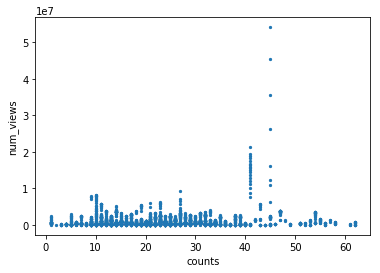

In [6]:
counts = list(youtube['count_tags'])
num_views = list(youtube['views'])

plt.scatter(counts,num_views, s=5)
plt.xlabel("counts")
plt.ylabel("num_views")

In [7]:
df = youtube[youtube['views'] > 5_000_000]
print(df.shape)
df.head()

(75, 6)


,title,tags,views,trending_date,publish_time,count_tags
3,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7224515,17.14.11,2017-11-10T07:38:29.000Z,9
26,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7563254,17.15.11,2017-11-10T07:38:29.000Z,9
45,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7727696,17.16.11,2017-11-10T07:38:29.000Z,9
62,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",8041928,17.17.11,2017-11-10T07:38:29.000Z,9
374,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,"[5-Minute Crafts, ""DIY"", ""Do it yourself"", ""cr...",6315549,17.04.12,2017-12-03T08:30:00.000Z,45


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCC6F7C8D0>,
      dtype=object)

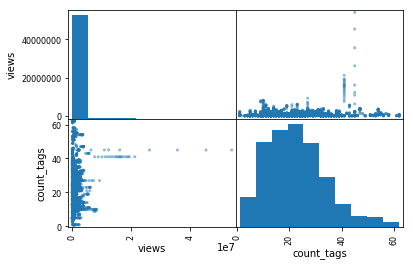

In [8]:
pd.plotting.scatter_matrix(youtube)

## Popular Tags
Top 10 popular tags

We use value_counts method to count the number of mentioning tags and put it in dataframe.

In [9]:
pd.set_option('display.max_colwidth', -1)
tags = youtube['tags'].apply(pd.Series).stack()
tags_df =youtube['tags'].apply(pd.Series).stack()

pop_tags = youtube['tags'].value_counts()

pop_tagsDF = pd.DataFrame({'tags':pop_tags.index, 'counts':pop_tags.values})
pop_tagsDF.head()

,tags,counts
0,"[beauty, ""how to"", ""makeup"", ""howto"", ""style"", ""fashion"", ""summer"", ""spring"", ""new"", ""clothes"", ""clothing"", ""bunny"", ""follow me around"", ""target"", ""shop"", ""shopping"", ""cosmetics"", ""funny"", ""haul"", ""store"", ""look"", ""silly"", ""cute"", ""eye"", ""eyes"", ""iphone"", ""vlog"", ""grav3yardgirl"", ""as seen on tv"", ""infomercial"", ""does it work"", ""nail"", ""nails"", ""bed bath & beyond"", ""ulta"", ""2018"", ""cheap makeup"", ""makeup shopping"", ""clearance"", ""clearance makeup"", ""toys r us"", ""closing"", ""store closing"", ""dior"", ""dior handbag"", ""luxury"", ""designer""]",31
1,"[cupcakes, ""how to make vanilla cupcakes"", ""over the top recipes"", ""easy cupcake recipes"", ""vanilla cupcakes"", ""chocolate cupcakes"", ""french macarons"", ""how to make macarons"", ""the scran line"", ""the scranline"", ""nick makrides"", ""pastry design"", ""how to pipe cupcakes""]",31
2,"[Business Insider, ""Business News"", ""scheduling"", ""bed time"", ""way of the warrior kid"", ""jocko willink"", ""navy seals"", ""army schedule"", ""army"", ""military schedule"", ""waking up early"", ""early morning"", ""success how i did it"", ""success podcast""]",27
3,"[the green makeup challenge, ""green makeup challenge"", ""green"", ""green makeup look"", ""green makeup"", ""makeup"", ""challenge"", ""makeup challenge"", ""nikkietutorials"", ""nikkie tutorials"", ""nikkitutorials"", ""nikki tutorials"", ""makeup tutorial"", ""tutorial"", ""hulk"", ""the hulk"", ""hulk makeup"", ""avengers"", ""avengers infinity war"", ""kermit the frog"", ""kermit"", ""how to"", ""how to apply"", ""foundation"", ""eyeshadow"", ""lipstick"", ""transformation"", ""extreme transformation"", ""glam"", ""flawless"", ""gorgeous"", ""beautiful""]",27
4,"[ysac, ""you suck at cooking"", ""coconut"", ""macaroons"", ""coconut macaroons"", ""chocolate"", ""cooking"", ""recipe"", ""chef"", ""how to"", ""turorial"", ""funny"", ""comedy"", ""dessert""]",25


The number of views collerated to 10 popular tags

In [10]:
pop_tagsDF = pop_tagsDF.drop_duplicates(subset=['counts'])
pop_tagsDF = pop_tagsDF.head(10)

dict_popTags = {}
for elem,count in zip(pop_tagsDF['tags'], pop_tagsDF['counts']) :
    
    dict_popTags[elem[0]] = count

list_popTags = list(dict_popTags.keys())

dict_popViews = {}

for popTag in list_popTags:
    
    currViews = 0
    for tags,views in zip(youtube['tags'],youtube['views']):
        if(popTag in tags):
            currViews = currViews + views
    
    dict_popViews[popTag] = currViews
    
dict_popViews

{'beauty': 171718550,
 'Business Insider': 96489336,
 'ysac': 15509700,
 'olivia jade': 12049788,
 'DIY': 225026760,
 'spongebob': 15698206,
 'lifestyle': 55604430,
 'kim kardashian': 46382270,
 'kinetic sand': 20292643,
 'cook': 92452024}

Mean views for top 10 tags

In [11]:
dict_popMeans = {}
for tag in dict_popViews:
    dict_popMeans[tag] = dict_popViews[tag] / dict_popTags[tag]

    
dict_popMeans

{'beauty': 5539308.064516129,
 'Business Insider': 3573679.111111111,
 'ysac': 620388.0,
 'olivia jade': 523903.82608695654,
 'DIY': 10715560.0,
 'spongebob': 784910.3,
 'lifestyle': 2926548.947368421,
 'kim kardashian': 2576792.777777778,
 'kinetic sand': 1193684.8823529412,
 'cook': 5778251.5}

Plot of Tags vs Mean Views - top 10

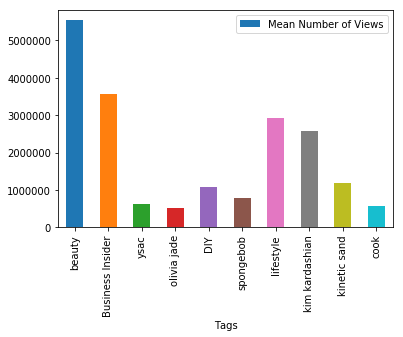

In [12]:
data = [['beauty', 5539308.064516129], ['Business Insider', 3573679.111111111], ['ysac', 620388.0], ['olivia jade', 523903.82608695654], ['DIY', 1071556.0], ['spongebob', 784910.3], ['lifestyle', 2926548.947368421], ['kim kardashian', 2576792.777777778], ['kinetic sand', 1193684.8823529412], ['cook', 577825.5]]
df_pop = pd.DataFrame(data, columns = ['Tags', 'Mean Number of Views'])
ax = df_pop.plot.bar(x='Tags', y='Mean Number of Views', rot=90)

# Tags Summary
We found out that the top ten popular tags were beauty, business insider, ysac, olivia jade, DIY, spongebob, lifesttyle, kim kardashian, kinetic sand, and cook from this dataset. With the most popular tag related to beauty. And the least popular tag related to cook.

# Sentiment Analysis of Titles

Here we are performing a sentiment analysis on the titles of all the videos on our data set in order to determine if there is a relationship between the amount of views and its overall sentiment score. We used the Vader Lexicon from the NLTK package.

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We write a function in order to allow us to view different subsets of our Youtube video dataframe. This will be helpful when we compare extremely viral videos versus the rest of the dataframe.


In [14]:
def title_sentiments(df):
    title_sentiment = []
    title_sentiment_ind = []

    titles = df['title']

    zero_sentiment = 0

    # Add only non-zero sentiment analysis of titles into 'title_sentiment'
    for i, title in zip(range(len(titles)), titles):
        sentiment = analyser.polarity_scores(title)
        
        if sentiment['compound'] != 0:
            title_sentiment.append(sentiment['compound'])
            title_sentiment_ind.append(i)
        if sentiment['compound'] == 0:
            zero_sentiment += 1
            
    return title_sentiment, title_sentiment_ind, zero_sentiment


Additionally, we make sure to drop any duplicate rows that are a result of a video that trends for multiple days. While this information may be helpful when examining how long it takes for a video to become popular after being published, for the purposes of sentiment analysis it only adds more noise to the data.

We also print out the first 50 titles that return non-zero sentiments using NLTK vader.

In [15]:
# Drop duplicate titles, we are only interested in the last title that was trending
youtube.drop_duplicates(subset='title', keep='last',inplace=True)

title_sentiment, title_sentiment_ind, zero_sentiment = title_sentiments(youtube)

# Print out test results
print('Sentiment score of first 50 titles with non-zero sentiment scores:')
print(title_sentiment[:50])
print('\nIndex of the first 50 non-zero sentiment titles')
print(title_sentiment_ind[:50])
print('\nNumber of sentiment videos: ' + str(len(title_sentiment_ind)))
print("Number of Zero sentiment videos: " + str(zero_sentiment))
    

Sentiment score of first 50 titles with non-zero sentiment scores:
[0.5574, -0.7088, 0.4939, 0.4588, 0.2342, -0.2732, 0.7964, 0.0516, 0.2263, -0.3612, 0.4588, -0.4404, -0.1779, 0.4926, 0.7579, -0.128, 0.5106, 0.5859, -0.4619, 0.8225, 0.6239, 0.3818, 0.7096, -0.4767, 0.4728, 0.5719, 0.4019, 0.658, 0.2584, 0.4215, -0.34, 0.4019, 0.5859, -0.3612, 0.2023, -0.4215, 0.5106, 0.4939, 0.5719, 0.4278, 0.4404, 0.3182, 0.6739, -0.7604, 0.5859, 0.0989, 0.4404, 0.5859, 0.508, 0.6037]

Index of the first 50 non-zero sentiment titles
[1, 5, 7, 11, 23, 24, 25, 26, 27, 30, 32, 33, 34, 35, 38, 40, 45, 47, 51, 54, 56, 57, 58, 62, 63, 64, 65, 67, 69, 73, 74, 77, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 94, 95, 97, 103, 105, 106, 107]

Number of sentiment videos: 280
Number of Zero sentiment videos: 322


# Title Sentiment Visualization
First, we graph all of the video titles that returned a non-zero sentiment (i.e. the NLTK toolkit was able to return a sentiment score) against its number of views. 

Text(0, 0.5, 'Number of views')

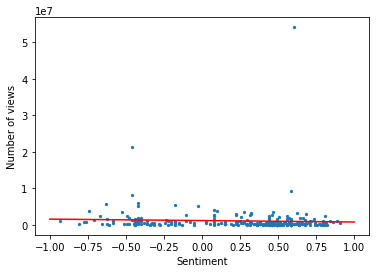

In [16]:
views = list(youtube['views'])
views_sent = []

for i in title_sentiment_ind:
    views_sent.append(views[i])

a_views, b_views = np.polyfit(title_sentiment, views_sent,1 )  
sentiment_range = np.linspace(-1, 1, 10)
pred_views = a_views*sentiment_range + b_views

plt.scatter(title_sentiment, views_sent, s=5)
plt.plot(sentiment_range, pred_views, c = 'red')
plt.xlabel('Sentiment')
plt.ylabel('Number of views')

Text(0, 0.5, 'Frequency')

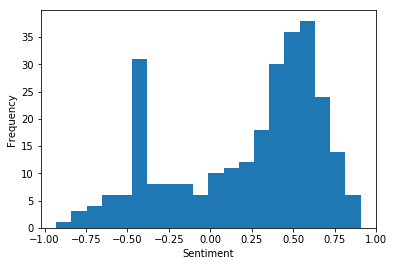

In [17]:
plt.hist(title_sentiment, bins=20)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

Looking at the above two graphs, by inspection we have a feeling that there is not a strong correlation between sentiment and number of views. Representing the sentiment with a histogram, we see how the title sentiments are bimodal. More videos tend to populate the -0.50 and 0.50 areas of sentimentality. We also notice that there are some videos with large numbers of views (i.e. > 4,000,000 views).

Next, we are going to run an OLS regression model to calculate some statistics and run statistical tests. 

In [18]:
import patsy
import statsmodels.api as sm

data = {'title_sentiment': title_sentiment, 'views_sent': views_sent}
sentiment_df = pd.DataFrame(data=data)

outcome_1, predictors_1 = patsy.dmatrices('title_sentiment ~ views_sent', data=sentiment_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())


                            OLS Regression Results                            
Dep. Variable:        title_sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6447
Date:                Fri, 31 May 2019   Prob (F-statistic):              0.423
Time:                        09:01:44   Log-Likelihood:                -168.26
No. Observations:                 280   AIC:                             340.5
Df Residuals:                     278   BIC:                             347.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2278      0.028      8.229      0.0

From the above result, using an alpha of 0.01, we conclude that we don't have statistically significant evidence (i.e. Prob(F-stat) >> 0.01) that a youtube video's title sentiment is correlated with its number of views. 

However, what if this is due to those 'viral' videos (i.e. views > 5,000,000) that we mentioned above? In the next part we run seperate tests on videos with >5,000,000 views and <5,000,000 views.

Text(0, 0.5, 'Number of Views')

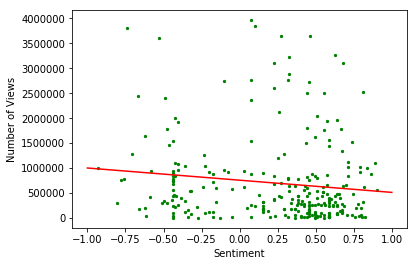

In [20]:
views_sent_norm = []

youtube_norm = youtube[youtube['views'] < 5_000_000]

views = list(youtube_norm['views'])

title_sentiment_norm, title_sentiment_ind_norm, zero_sentiment_norm = title_sentiments(youtube_norm)

for i in title_sentiment_ind_norm:
    views_sent_norm.append(views[i])
    
a_norm, b_norm = np.polyfit(title_sentiment_norm, views_sent_norm, 1)
sent_norm_range = np.linspace(-1, 1, 10)
views_norm_pred = a_norm*sent_norm_range + b_norm


plt.scatter(title_sentiment_norm, views_sent_norm, s=5, c='g')
plt.plot(sent_norm_range, views_norm_pred, c = 'red')
plt.xlabel('Sentiment')
plt.ylabel('Number of Views')

Text(0, 0.5, 'Frequency')

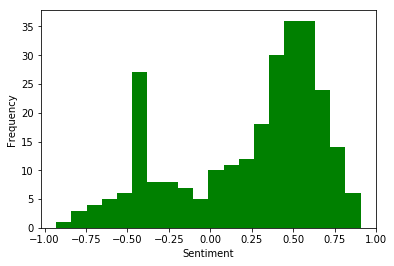

In [21]:
plt.hist(title_sentiment_norm, bins=20, color='green')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

In this scatterplot, the videos whose view counts exceed 5,000,000 are left out in order to observe the data clusters in better detail. We can see from the scatterplot that there is no clear linear pattern to the data and that the histogram is still bimodal. 

In [22]:
data = {'title_sentiment': title_sentiment_norm, 'views_sent': views_sent_norm}
sentiment_df_norm = pd.DataFrame(data=data)

outcome_1, predictors_1 = patsy.dmatrices('title_sentiment ~ views_sent', data=sentiment_df_norm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        title_sentiment   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.367
Date:                Fri, 31 May 2019   Prob (F-statistic):             0.0376
Time:                        09:02:21   Log-Likelihood:                -157.72
No. Observations:                 271   AIC:                             319.4
Df Residuals:                     269   BIC:                             326.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2796      0.034      8.146      0.0

Once again, even when we exclude 'viral' videos we don't have statistically significant evidence that sentiment is correlated with the number of views a video gets.

Lastly, let's see if there is a correlation between sentiment and number of views in 'viral' videos.

Text(0, 0.5, 'Number of Views')

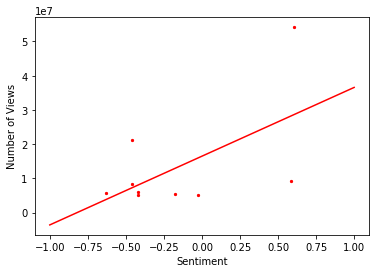

In [28]:
views_sent_viral = []

youtube_viral = youtube[youtube['views'] > 5_000_000]

views = list(youtube_viral['views'])

title_sentiment_viral, title_sentiment_ind_viral, zero_sentiment_viral = title_sentiments(youtube_viral)

for i in title_sentiment_ind_viral:
    views_sent_viral.append(views[i])

a_views_viral, b_views_viral = np.polyfit(title_sentiment_viral, views_sent_viral, 1)
title_sent_viral_range = np.linspace(-1, 1, 10)
views_viral_pred = a_views_viral*title_sent_viral_range + b_views_viral

plt.scatter(title_sentiment_viral, views_sent_viral, s=5, c='r')
plt.plot(title_sent_viral_range, views_viral_pred, c = 'r')
plt.xlabel('Sentiment')
plt.ylabel('Number of Views')

Text(0, 0.5, 'Frequency')

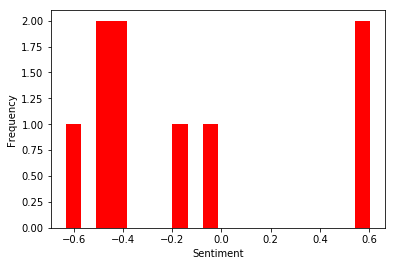

In [24]:
plt.hist(title_sentiment_viral, bins=20, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

In [25]:
data = {'title_sentiment': title_sentiment_viral, 'views_sent': views_sent_viral}
sentiment_df_viral = pd.DataFrame(data=data)

outcome_1, predictors_1 = patsy.dmatrices('title_sentiment ~ views_sent', data=sentiment_df_viral)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        title_sentiment   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     3.422
Date:                Fri, 31 May 2019   Prob (F-statistic):              0.107
Time:                        09:02:40   Log-Likelihood:                -3.4625
No. Observations:                   9   AIC:                             10.93
Df Residuals:                       7   BIC:                             11.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3742      0.179     -2.092      0.0

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


At this point, even amongst 'viral' videos it is no surprise that there is no correlation between sentiment and number of views.

Text(0, 0.5, 'Number of Views')

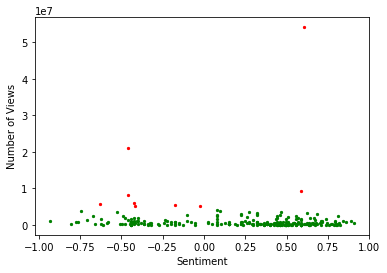

In [26]:
plt.scatter(title_sentiment_norm, views_sent_norm, s=5, c='g')
plt.scatter(title_sentiment_viral, views_sent_viral, s=5, c='r')
plt.xlabel('Sentiment')
plt.ylabel('Number of Views')

Text(0, 0.5, 'Frequency')

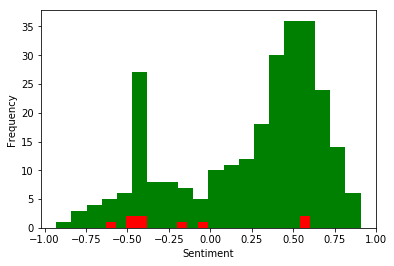

In [27]:
plt.hist(title_sentiment_norm, bins=20, color='green')
plt.hist(title_sentiment_viral, bins=20, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Sentiment Analysis Summary

In general, there tended to be more videos with positive sentiments than negative ones. However, based on our findings in this section, we conclude that there is no strong, univariate correlation between a youtube video's sentiment score (based on the NLTK vader's sentiment analysis) and its number of views. We did notice that videos tend to be bimodal around the +0.50 and -0.50 sentiment marks, although this has nothing to do with the popularity of the videos themselves. Additionally, there also was a tendency for viral videos (videos with over 5,000,000 views) to lean towards the negative sentiment side, although this could be due to a low viral video population.